In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
company = pd.read_csv('Company_Data.csv')

## EXPLORATORY DATA ANALYSIS

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
company.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
labelencoder = LabelEncoder()
company.iloc[:,6] = labelencoder.fit_transform(company.iloc[:,6])

In [9]:
company.iloc[:,6]

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [10]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [11]:
# Creating dummy variables for Urban and US
company2 = pd.get_dummies(company,columns=['Urban','US'])

In [12]:
company2.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,0,42,17,0,1,0,1
1,11.22,111,48,16,260,83,1,65,10,0,1,0,1
2,10.06,113,35,10,269,80,2,59,12,0,1,0,1
3,7.40,117,100,4,466,97,2,55,14,0,1,0,1
4,4.15,141,64,3,340,128,0,38,13,0,1,1,0


In [13]:
x = company2.iloc[:,1:]
y = company2.iloc[:,0]

In [14]:
#Splitting data into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## MODEL BUIDING USING DECISION TREE AND REGRESSOR METHOD

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
model_R = DecisionTreeRegressor()
model_R.fit(x_train, y_train)

DecisionTreeRegressor()

In [20]:
preds = model_R.predict(x_test)

In [21]:
np.mean(preds==y_test)

0.0125

In [19]:
#Find the accuracy
model_R.score(x_test,y_test)

0.35387652383874724

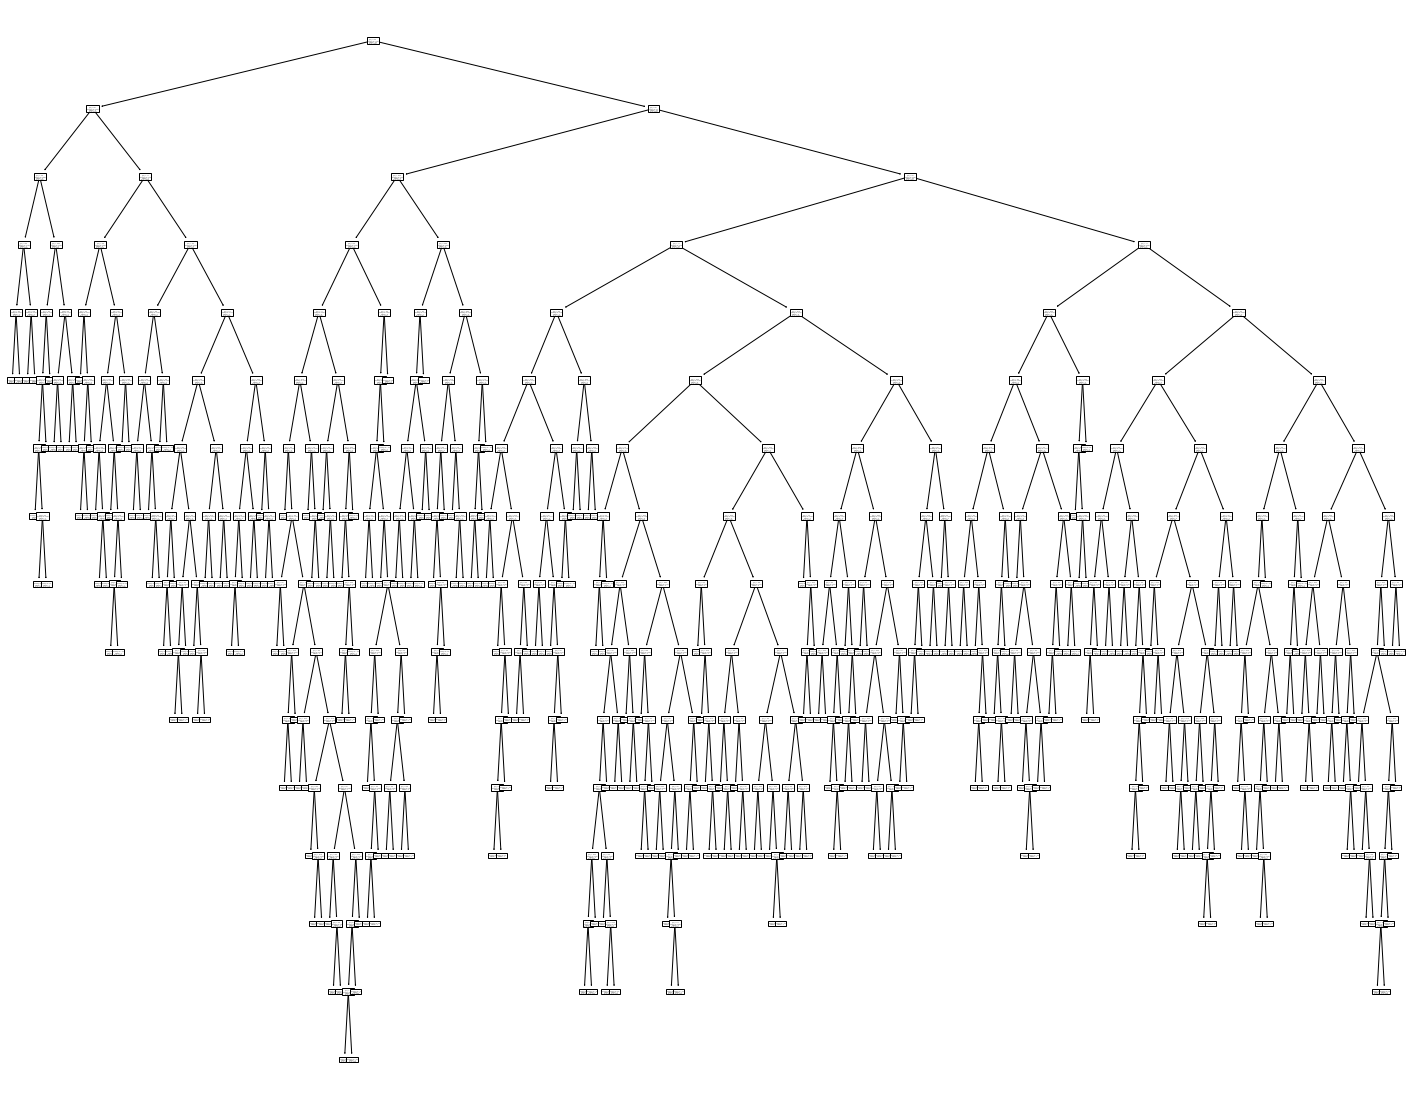

In [22]:
# Decision Tree Regression
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model_R)